##Import of Libraries

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##Initial Study of the Dataset

In [12]:
titanic = pd.read_csv('titanic.csv')
pd.set_option('display.max_rows',None)

In [13]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [14]:
titanic.shape

(1309, 14)

Pandas allows us to see the descriptive statistics of all the variables

In [15]:
titanic.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
survived,1309.0,NaN,NaN,NaN,0.381971,0.486055,0.0,0.0,0.0,1.0,1.0
name,1309,1307,"Kelly, Mr. James",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1046.0,NaN,NaN,NaN,29.881135,14.4135,0.1667,21.0,28.0,39.0,80.0
sibsp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0
parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
ticket,1309,929,CA. 2343,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare,1308.0,NaN,NaN,NaN,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292
cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can eliminate those variables that will not serve the objective task, for example variables that are identifiers.

We have the following identifiers: *cabin*, *name*, *ticket*, *boat*, *body*, *home.dest*

In [16]:
titanic.drop(columns=['cabin','name','ticket','boat','body','home.dest'],inplace=True)

In [17]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


We can see what values there are in the categorical variables

In [18]:
titanic.embarked.unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [19]:
titanic.sex.unique()

array(['female', 'male'], dtype=object)

We will reorder the columns so that the **response variable** (survival) is first.

In [20]:
cols = list(titanic.columns)
cols.remove('survived')
cols.insert(0,'survived')
titanic = titanic.reindex(columns=cols)

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,0,1,female,2.0000,1,2,151.5500,S
3,0,1,male,30.0000,1,2,151.5500,S
4,0,1,female,25.0000,1,2,151.5500,S


##Basic Visualization

###Histograms
Let's display the histogram of the numerical variables: *age*, sibsp, *parch*, *fare*


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

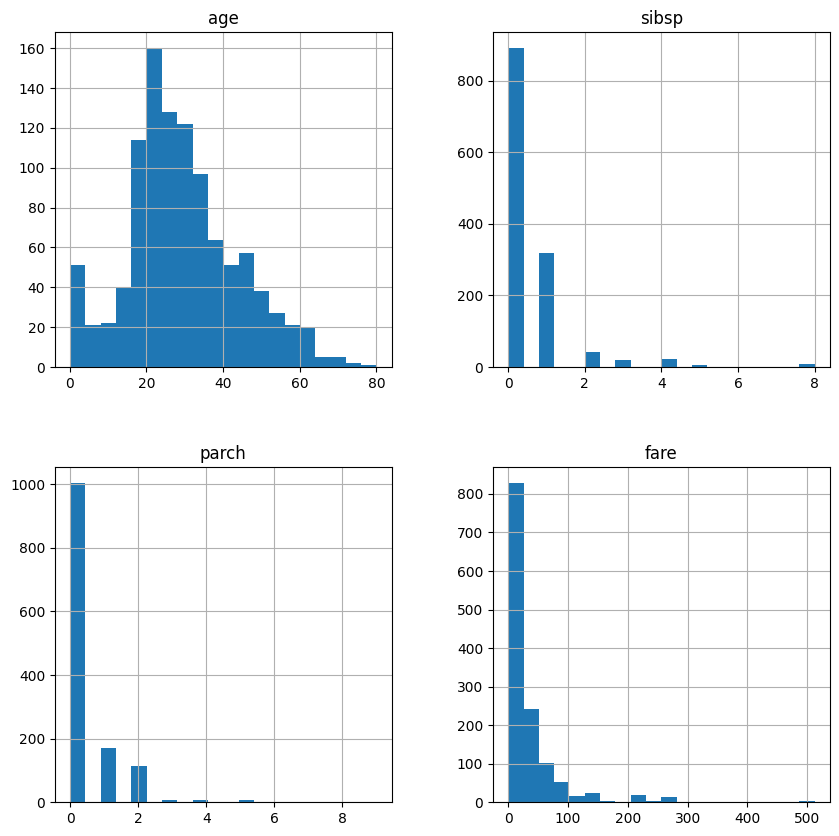

In [21]:
titanic.loc[:,['age','sibsp','parch','fare']].hist(bins=20,figsize=(10,10))

###Relation with Response Variable

We can visualize groups of variables in relation to the response variable

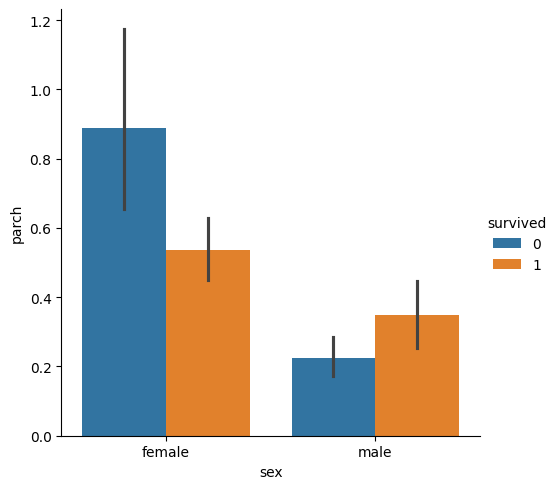

In [22]:
sns.catplot(data=titanic,kind='bar',x='sex',y='parch',hue='survived')

<Axes: xlabel='sex', ylabel='age'>

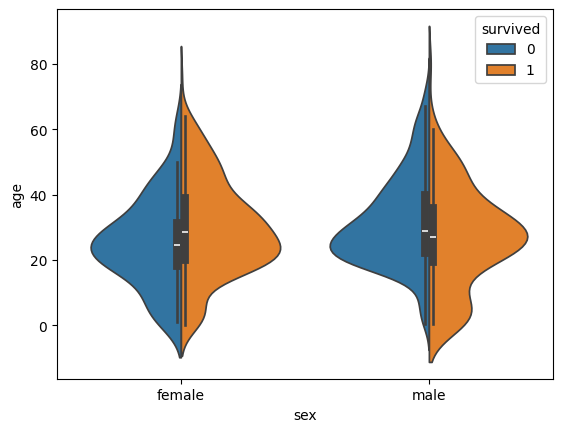

In [23]:
sns.violinplot(data=titanic,x='sex',y='age',hue='survived',split=True)

We can also visualize the relationship between the different variables by calculating their correlation.

The correlation coefficient is measured on a scale that varies from + 1 through 0 to – 1.

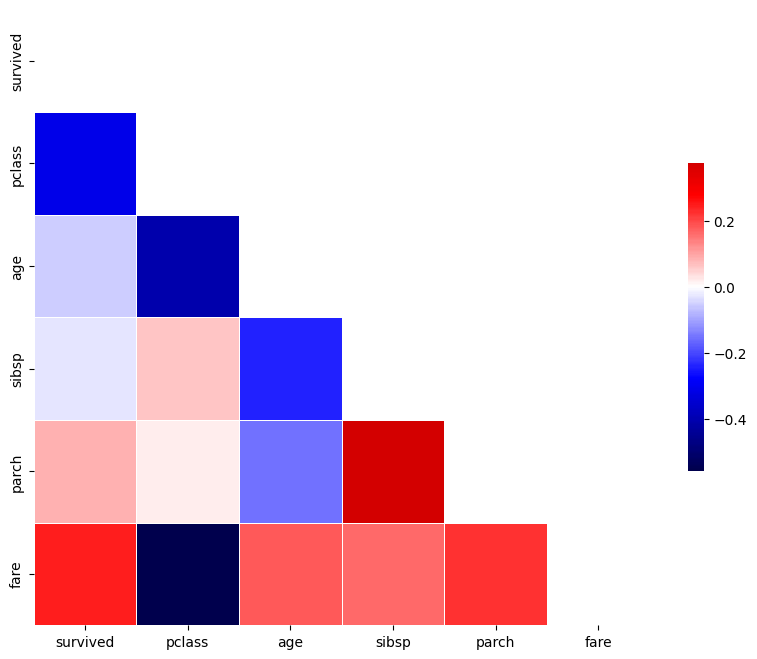

In [25]:
# Compute the correlation matrix only on numeric columns
corr = titanic.select_dtypes(include='number').corr()

# Create a mask to display only half the heatmap (optional for visualization)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic', center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()


A positive correlation is a relationship between two variables such that as the value of **one variable increases**, **the other increases**.

A negative correlation is a relationship between two variables such that as the value of **one variable increases**, **the other decreases**.